# Linear Regression model for predicting the marks with number of hours given

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## Task 2
Simple Linear Regression

Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$
Linear function:$$
Yhat = a + b  X
$$

a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading the data set
df = pd.read_csv("student_scores - student_scores.csv.txt")

In [3]:
# Print the first five rows of the data set
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Dimensions of the dataframe
df.shape

(25, 2)

In [5]:
# list the data types for each column
print(df.dtypes)

Hours     float64
Scores      int64
dtype: object


# EDA

In [6]:
# Let's first describe the data set
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
# Let see the some information about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


 Their is no data is missing 

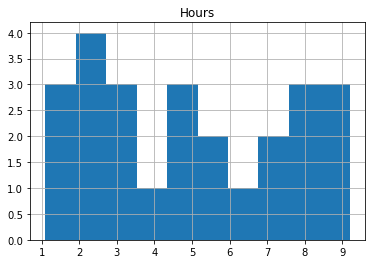

In [8]:
# Lets select these features to explore more.
# we can plot each of these features:
viz = df[['Hours']]
viz.hist()
plt.show()

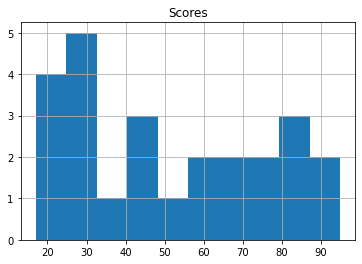

In [9]:
# Lets select these features to explore more.
# we can plot each of these features:
viz = df[['Scores']]
viz.hist()
plt.show()

In [10]:
# We can also plot this data using seaborn libraries

Text(0, 0.5, 'Scores obtained')

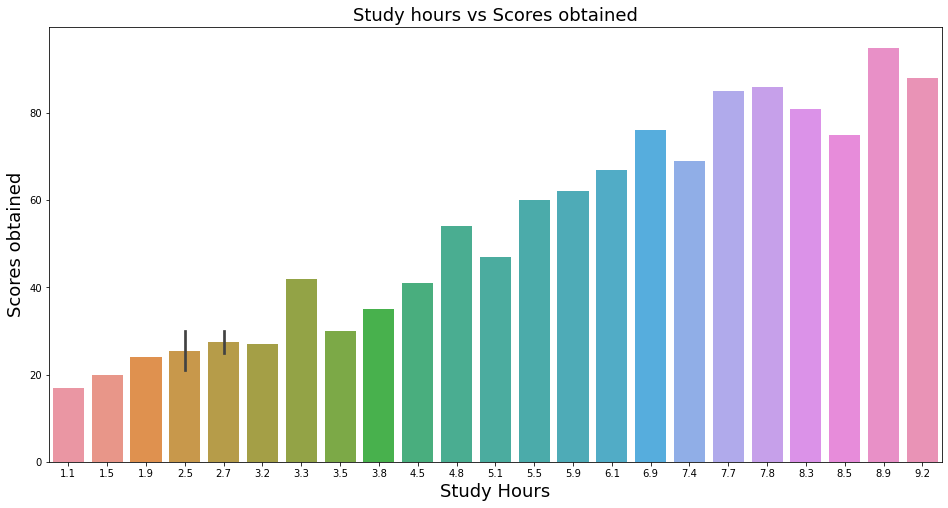

In [14]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(x='Hours',y='Scores',data=df)
plt.title('Study hours vs Scores obtained',size=18)
plt.xlabel('Study Hours',size=18)
plt.ylabel('Scores obtained',size=18)

From the graph we can clearly seen that when the number of study hours is increasses then score of thr student is also increasses

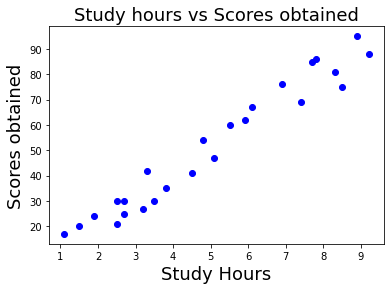

In [16]:
# Now, lets plot each of these Scores vs the Hours, to see how linear is their relation:
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.title('Study hours vs Scores obtained',size=18)
plt.xlabel('Study Hours',size=18)
plt.ylabel('Scores obtained',size=18)
plt.show()

Their is a linear relanship between the data set from the figure

## Creating train and test dataset

we can create train test with the ratio of 80 and 20 which is normally used 

In [18]:
X = df[['Hours']]
y = df['Scores']

In [20]:
!pip install sklearn

Processing c:\users\khana\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp36-cp36m-win_amd64.whl (6.8 MB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [21]:
# using the sklearn to dividing the train and test data set 

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

Applying the simplelinear regreation model using sklearn model

In [23]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Let's fit the regreation line 

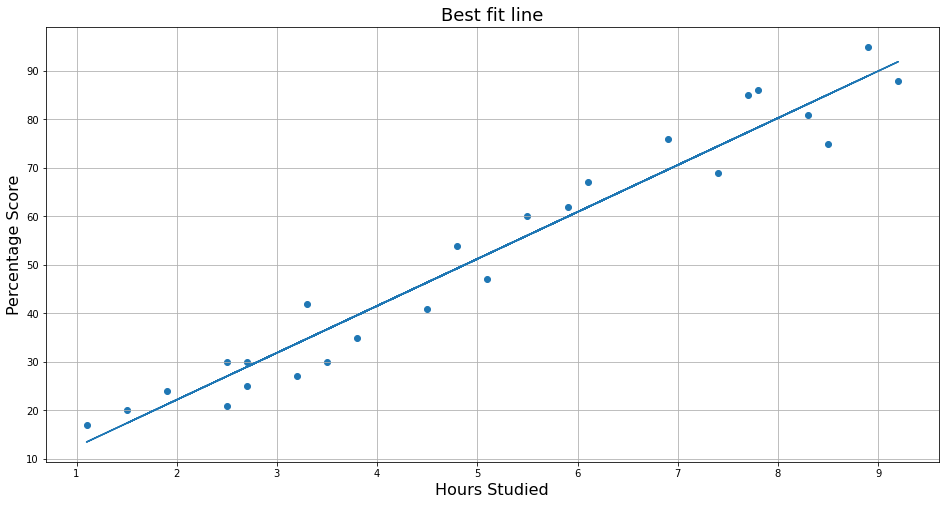

In [24]:
# Plotting the regression line
regression_line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.figure(figsize=(16,8))
plt.scatter(X, y)
plt.plot(X, regression_line);
plt.title('Best fit line',size=18)
plt.xlabel('Hours Studied',size=16)  
plt.ylabel('Percentage Score',size=16)
plt.grid()
plt.show()

## Making Predictions

Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [25]:
predictions = lm.predict(X_test) 
predictions

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [28]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [35]:
#Here we can take input from the user and then predict the results
# You can also test with your own data
# taking user input 
hours = int(input('Enter the hours studied : '))
user_pred = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f} %".format(user_pred[0]))

Enter the hours studied : 7
No of Hours = 7
Predicted Score = 70.60 %


## Evaluating the model

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))


print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
